<a href="https://colab.research.google.com/github/RCaminero/k-meanS-ALGORITHM/blob/main/k_means_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**GASTOS DE EMPLEADOS SEGÚN SUELDOS**



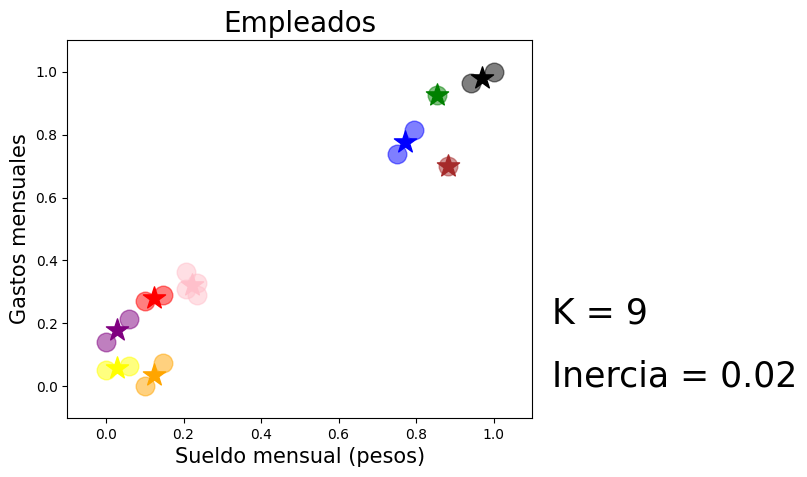

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

personas = pd.DataFrame({"sueldos" : [50000, 45000, 48000, 43500, 47000, 52000, 
                                    20000, 26000, 25000, 23000, 21400, 18000,
                                    20000, 26000, 25000, 23000, 21400, 18000],
                         
                         "gastos": [39000, 35000, 32000, 33000, 38000, 40000,
                                           19000, 22000, 21500, 21000, 20500, 17000,
                                           15000, 21000, 23000, 15200, 13250, 14670]})

escalador = MinMaxScaler().fit(personas.values)

personas = pd.DataFrame(escalador.transform(personas.values),
                       columns=["sueldos", "gastos"])

kmeans = KMeans(n_clusters=9).fit(personas.values)

personas["cluster"] = kmeans.labels_

# Instrucciones para graficar los clusters 

plt.figure(figsize=(6, 5), dpi=100)

colores = ["red", "blue", "orange", "black", "purple", "pink", "brown","yellow", "green"]

for cluster in range(kmeans.n_clusters):
    plt.scatter(personas[personas["cluster"] == cluster]["sueldos"],
                personas[personas["cluster"] == cluster]["gastos"],
                marker="o", s=180, color=colores[cluster], alpha=0.5)
    
    plt.scatter(kmeans.cluster_centers_[cluster][0], 
                kmeans.cluster_centers_[cluster][1], 
                marker="*", s=280, color=colores[cluster])

plt.title("Empleados", fontsize=20)
plt.xlabel("Sueldo mensual (pesos)", fontsize=15)
plt.ylabel("Gastos mensuales", fontsize=15)
plt.text(1.15, 0.2, "K = %i" % kmeans.n_clusters, fontsize=25)
plt.text(1.15, 0, "Inercia = %0.2f" % kmeans.inertia_, fontsize=25)
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)    
plt.show()

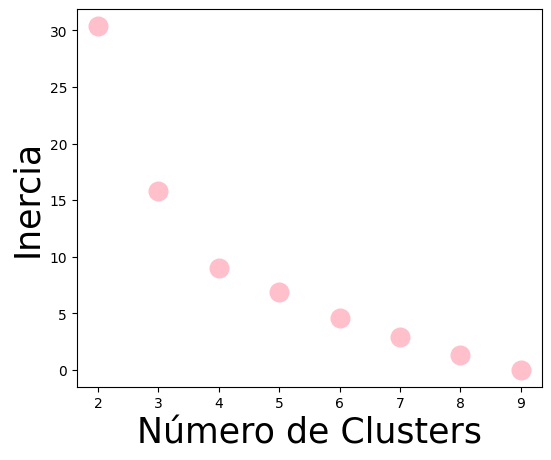

In [ ]:
inercias = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(personas.values)    
    inercias.append(kmeans.inertia_)

plt.figure(figsize=(6, 5), dpi=100)
plt.scatter(range(2, 10), inercias, marker="o", s=180, color="pink")
plt.xlabel("Número de Clusters", fontsize=25)
plt.ylabel("Inercia", fontsize=25)
plt.show()